**1. Деректерді зерттеу**


In [1]:
#Деректерді зерттеу
import seaborn as sns
import pandas as pd

# Titanic деректер жинағын жүктеу
titanic = sns.load_dataset("titanic")
print(titanic)

# Өлшемін (shape) шығару
print("Деректер өлшемі:", titanic.shape)

# Бағандарын шығару
print("\nБағандар тізімі:")
print(titanic.columns)

# Әр бағандағы бос мәндерді санау
print("\nБос мәндер саны:")
print(titanic.isnull().sum())

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

**2.Сандық бағандарды сипаттау**

In [15]:


# age және fare бағандарының статистикасы
age_stats = titanic["age"].describe()[["mean", "min", "max", "std"]]
fare_stats = titanic["fare"].describe()[["mean", "min", "max", "std"]]

print("AGE статистикасы:")
print(age_stats)

print("\n FARE статистикасы:")
print(fare_stats)

AGE статистикасы:
mean    29.699118
min      0.420000
max     80.000000
std     14.526497
Name: age, dtype: float64

 FARE статистикасы:
mean     32.204208
min       0.000000
max     512.329200
std      49.693429
Name: fare, dtype: float64


**3.Гистограмма**

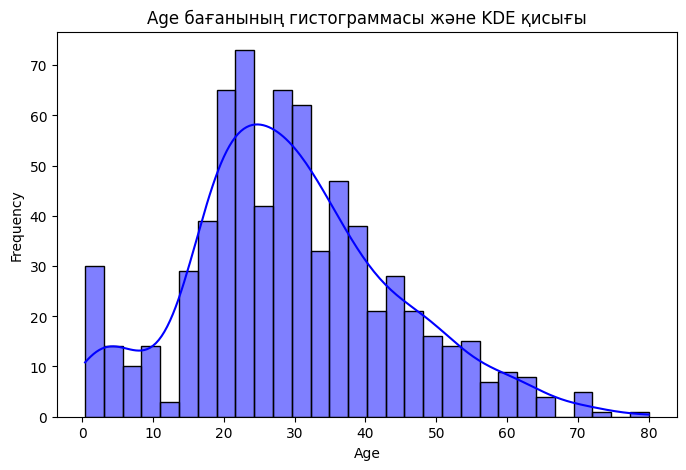

In [ ]:
# Гистограмма + KDE бейнелеу
import matplotlib.pyplot as plt
df = sns.load_dataset("titanic")
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, kde=True, color="blue")

plt.title("Age бағанының гистограммасы және KDE қисығы")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**4.Boxplot**

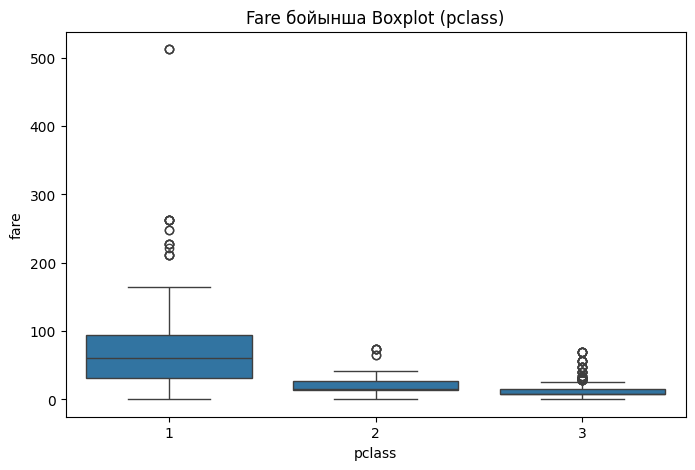

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Titanic датасетін жүктеу
titanic = sns.load_dataset("titanic")

# pclass бойынша fare бағанының Boxplot-ы
plt.figure(figsize=(8, 5))
sns.boxplot(data=titanic, x="pclass", y="fare")
plt.title("Fare бойынша Boxplot (pclass)")
plt.show()

**5.Scatter plot**

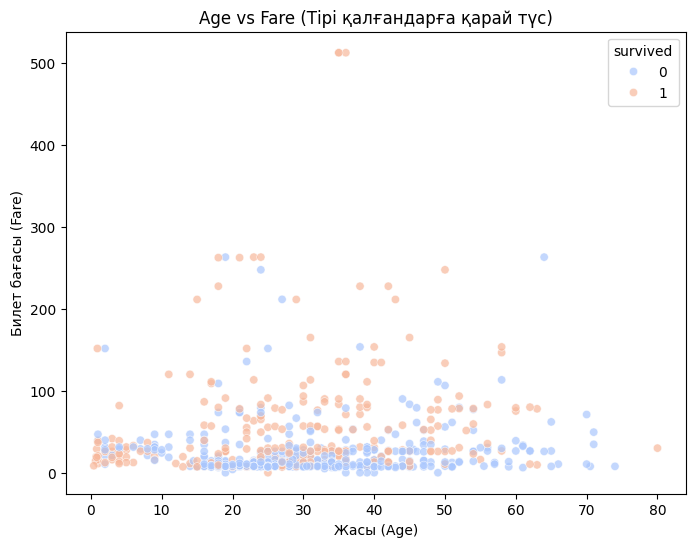

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Titanic деректерін жүктеу
titanic = sns.load_dataset("titanic")

# Нүктелік диаграмма (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=titanic,
    x="age",
    y="fare",
    hue="survived",    # Түс survived бағаны арқылы
    palette="coolwarm",
    alpha=0.7           # мөлдірлік
)

plt.title("Age vs Fare (Тірі қалғандарға қарай түс)")
plt.xlabel("Жасы (Age)")
plt.ylabel("Билет бағасы (Fare)")
plt.show()

**6.Heatmap**

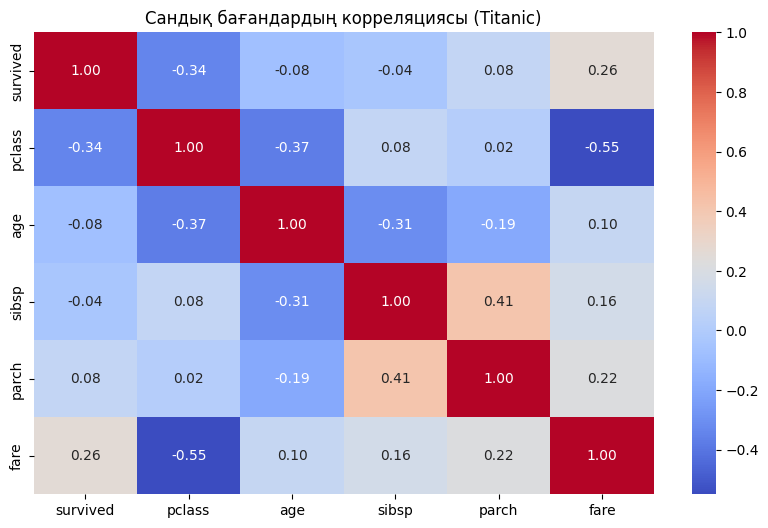

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Titanic деректерін жүктеу
df = sns.load_dataset("titanic")

# Тек сандық бағандарды таңдау
numeric_df = df.select_dtypes(include="number")

# Корреляция матрицасы
corr_matrix = numeric_df.corr()

# Heatmap визуализациясы
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Сандық бағандардың корреляциясы (Titanic)")
plt.show()

**7.Бос мәндерді өңдеу**

In [9]:
df['age'].fillna(df['age'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


/tmp/ipython-input-873788543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)
/tmp/ipython-input-873788543.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

**8. Санаттық белгілерді кодтау**

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df = pd.get_dummies(df, columns=['embarked'])
print(df)

     survived  pclass  sex   age  sibsp  parch     fare   class    who  \
0           0       3    1  22.0      1      0   7.2500   Third    man   
1           1       1    0  38.0      1      0  71.2833   First  woman   
2           1       3    0  26.0      0      0   7.9250   Third  woman   
3           1       1    0  35.0      1      0  53.1000   First  woman   
4           0       3    1  35.0      0      0   8.0500   Third    man   
..        ...     ...  ...   ...    ...    ...      ...     ...    ...   
886         0       2    1  27.0      0      0  13.0000  Second    man   
887         1       1    0  19.0      0      0  30.0000   First  woman   
888         0       3    0   NaN      1      2  23.4500   Third  woman   
889         1       1    1  26.0      0      0  30.0000   First    man   
890         0       3    1  32.0      0      0   7.7500   Third    man   

     adult_male deck  embark_town alive  alone  embarked_C  embarked_Q  \
0          True  NaN  Southampton    

**9. Feature Engineering**

In [8]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 12, 18, 60, 100],
    labels=['child', 'teen', 'adult', 'senior']
)
df[['age', 'family_size', 'age_group']].head()

,age,family_size,age_group
0,22.0,2,adult
1,38.0,2,adult
2,26.0,1,adult
3,35.0,2,adult
4,35.0,1,adult


**10. Масштабтау (Scaling)**

In [11]:
from sklearn.preprocessing import StandardScaler

# Масштабтаушыны инициализациялаймыз
scaler = StandardScaler()

# Масштабтау керек бағандарды таңдаймыз
columns_to_scale = ['age', 'fare']

# Масштабтау
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Бастапқы және масштабталған мәндерді салыстыру
print(df[['age', 'fare']].head())
print("\nМасштабталған мәндер:")
print(df_scaled[['age', 'fare']].head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

Масштабталған мәндер:
        age      fare
0 -0.530377 -0.502445
1  0.571831  0.786845
2 -0.254825 -0.488854
3  0.365167  0.420730
4  0.365167 -0.486337


**11. Ауытқуларды анықтау**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# fare бағанын алу
fare = titanic['fare']

# Квантильдер
Q1 = fare.quantile(0.25)
Q3 = fare.quantile(0.75)
IQR = Q3 - Q1

# Шектер
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Төменгі шек:", lower_bound)
print("Жоғарғы шек:", upper_bound)

# Outliers таңдау
outliers = fare[(fare < lower_bound) | (fare > upper_bound)]
print("Экстремалды мәндер саны:", len(outliers))
print(outliers.head())

Төменгі шек: -26.724
Жоғарғы шек: 65.6344
Экстремалды мәндер саны: 116
1      71.2833
27    263.0000
31    146.5208
34     82.1708
52     76.7292
Name: fare, dtype: float64


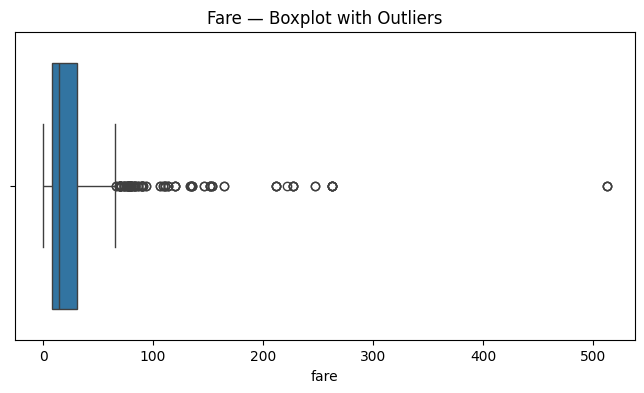

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x=titanic['fare'])
plt.title('Fare — Boxplot with Outliers')
plt.show()

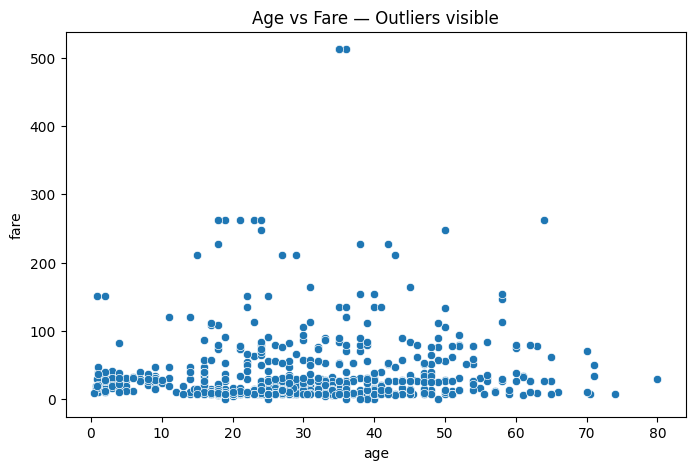

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=titanic, x='age', y='fare')
plt.title('Age vs Fare — Outliers visible')
plt.show()

**12. EDA қорытындысы**

1) Деректер сипаттамасы

Titanic датасеті 891 жолаушы жөніндегі ақпараттан тұрады.
Басты бағандар:

passengerid, name – идентификатор және мәтін

age, fare, sibsp, parch – сандық

sex, embarked, pclass – санаттық

survived – мақсатты белгi (0/1)

Файл өлшемі: df.shape → (891, 12)

2) Бос мәндер (Missing values)

Тексеру нәтижесі:

age бағанында бос мәндер болды → медианамымен толтырылды

embarked бағанында да бос мәндер болды → ең жиі кездесетін мәнмен толтырылды

басқа бағандарда елеулі бос мәндер жоқ

Бұл түзетулер деректерді толық қолдануға мүмкіндік берді.

3) Санаттық белгілерді кодтау
Label Encoding:

sex → 0/1 түріне ауыстырылды

One-Hot Encoding:

embarked → new columns: embarked_C, embarked_Q, embarked_S

Бұл модельге санаттық айнымалыларды сандар ретінде қолдануға мүмкіндік берді.

4) Feature Engineering

Жаңа белгілер жасалды:

family_size: family_size = sibsp + parch + 1
Жаңа баған жолаушының кемедегі отбасы мүшелері санын көрсетті.
age_group:

Жас бойынша топтау:

Age диапазоны	Топ
0–12	child
13–18	teen
19–60	adult
61–100	senior

Бұл топтау үлгі (pattern) анықтауға көмектесті.

5) Масштабтау (Scaling)

age және fare бағандары StandardScaler көмегімен масштабталды.
Нәтижесінде:

mean → 0

std → 1

Сәйкестік: логистикалық регрессия және SVM сияқты модельдер үшін жақсы.

6) Ауытқулар (Outliers)

IQR әдісімен fare бағанында экстремалды мәндер табылды:

жоғары құндар: > 100

Boxplot/Scatter plot арқылы визуалды түрде көрсетілді

Outliers жойылмады, себебі олар мәнді ақпарат болуы мүмкін (lux cabins).

7) Корреляция

Heatmap көрсеткені:

pclass ↔ fare арасында айқын байланыс бар

age ↔ survived әлсіз

sex ↔ survived өте күшті (әйелдер көп аман қалған)

Бұл ерекшеліктер модель үшін маңызды.

8) Жалпы қорытынды

- Деректер толық тазартылды: бос мәндер толтырылды.
- Санаттық белгілер кодталды: sex (Label), embarked (One-Hot).
- Жаңа feature жасалды: family_size және age_group.
- Масштабтау жасалды: age және fare StandardScaler.
- Outliers анықталды, бірақ жойылған жоқ.
- Визуализация арқылы үлгілер байқалды:

Әйелдер (sex=1) аман қалу ықтималдығы жоғары

1-класс жолаушылар жиі аман қалған

Жасы кіші балаларда да аман қалу жоғары